In [15]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:skyblue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [47]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

In [48]:
train_x.drop(columns=['측정일시'], inplace=True)
test_x.drop(columns=['측정일시'], inplace=True)

---

#### **<span style="color:skyblue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [49]:
# LinearRegression 코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()

In [50]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
model.fit(train_x,train_y)
y_pred = model.predict(test_x)

In [51]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print("R2_Score:", round(r2_score(test_y, y_pred), 5))
print("MSE:", round(mean_squared_error(test_y, y_pred), 5))

R2_Score: 0.93144
MSE: 37.83369


In [52]:
# 학습한 모델을 pkl 파일로 저장해보세요.
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)

['linear_regression_model.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:skyblue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [53]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# LinearRegression 코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
model = RandomForestRegressor()
train_y = np.ravel(train_y)

In [54]:
# Test 데이터로 성능을 평가해보세요.
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
print("R2_Score:", round(r2_score(test_y, y_pred), 5))
print("MSE:", round(mean_squared_error(test_y, y_pred), 5))

R2_Score: 0.92329
MSE: 42.33246


In [55]:
# 학습한 모델을 파일로 저장해보세요.
model_filename = 'random_forest_regressor.pkl'
joblib.dump(model, model_filename)

['random_forest_regressor.pkl']

In [56]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
importances = model.feature_importances_

# 각 특성의 중요도 출력
for feature, importance in zip(train_x.columns, importances):
    print(f"{feature}: {importance:.4f}")

SO2: 0.0008
CO: 0.0009
O3: 0.0016
NO2: 0.0025
PM10: 0.9602
PM25: 0.0040
기온(°C): 0.0012
강수량(mm): 0.0005
풍속(m/s): 0.0015
습도(%): 0.0017
증기압(hPa): 0.0011
이슬점온도(°C): 0.0012
전운량(10분위): 0.0009
중하층운량(10분위): 0.0009
시정(10m): 0.0021
지면온도(°C): 0.0018
5cm 지중온도(°C): 0.0012
10cm 지중온도(°C): 0.0016
month: 0.0004
day: 0.0020
hour: 0.0070
PM10_lag1: 0.0051


#### **<span style="color:skyblue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [57]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 초기화
model = GradientBoostingRegressor()
train_y = np.ravel(train_y)

# 모델 학습
model.fit(train_x, train_y)

GradientBoostingRegressor()

In [58]:
# Test 데이터로 성능을 평가해보세요.
y_pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)
print("R2_Score:", round(r2, 5))
print("RMSE:", round(rmse, 5))


R2_Score: 0.91694
RMSE: 6.77047


In [59]:
# 학습한 모델을 파일로 저장해보세요.
# 모델을 pkl 파일로 저장
model_filename = 'gradient_boosting_model.pkl'
joblib.dump(model, model_filename)

['gradient_boosting_model.pkl']

In [60]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
importances = model.feature_importances_

# 각 특성의 중요도 출력
for feature, importance in zip(train_x.columns, importances):
    print(f"{feature}: {importance:.4f}")

SO2: 0.0002
CO: 0.0001
O3: 0.0003
NO2: 0.0010
PM10: 0.9837
PM25: 0.0017
기온(°C): 0.0004
강수량(mm): 0.0002
풍속(m/s): 0.0004
습도(%): 0.0010
증기압(hPa): 0.0004
이슬점온도(°C): 0.0003
전운량(10분위): 0.0004
중하층운량(10분위): 0.0002
시정(10m): 0.0005
지면온도(°C): 0.0020
5cm 지중온도(°C): 0.0002
10cm 지중온도(°C): 0.0000
month: 0.0000
day: 0.0004
hour: 0.0026
PM10_lag1: 0.0042


c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\si

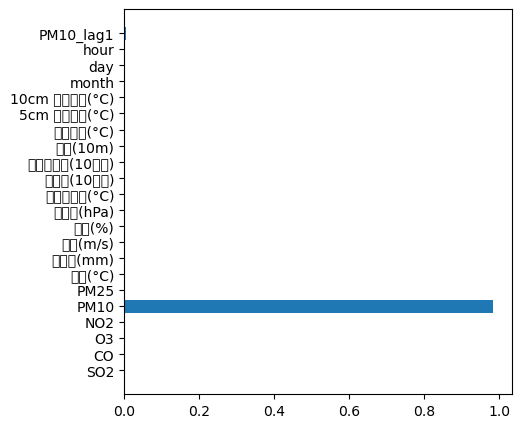

In [61]:
plt.figure(figsize=(5, 5))
plt.barh(y=list(train_x), width=model.feature_importances_)
plt.show()

#### **<span style="color:skyblue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [74]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state=1)

In [75]:
# Test 데이터로 성능을 평가해보세요.
# 검증하기
cv_score = cross_val_score(model, train_x, train_y, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 기록
result = {}
result['Decision Tree'] = cv_score.mean()

result

[0.90909234 0.95521683 0.93721599 0.92794188 0.8129415  0.78896352
 0.90505639 0.84333166 0.83174291 0.87829281]
평균: 0.8789795827769453
표준편차: 0.05399458374565364


{'Decision Tree': 0.8789795827769453}

In [76]:
# 학습한 모델을 파일로 저장해보세요.
# 학습한 모델을 파일로 저장해보세요.
model_filename = 'decision_tree_regressor.pkl'
joblib.dump(model, model_filename)

['decision_tree_regressor.pkl']

#### **<span style="color:skyblue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행 [GridSearchCV]</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [77]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
param = {'n_estimators': range(1, 300, 50)}

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# 선언하기
model_DT = GradientBoostingRegressor()

# Grid Search 선언
  # cv=5
  # scoring='r2'
model = GridSearchCV(model_DT, param, cv=5, scoring='r2')

In [83]:
# 학습하기
model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': range(1, 300, 50)}, scoring='r2')

In [84]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[-0.97075779  0.92517164  0.91759044  0.92473633  0.92747015  0.91781126]
--------------------------------------------------------------------------------
최적파라미터: {'n_estimators': 201}
--------------------------------------------------------------------------------
최고성능: 0.9274701500951219


#### **<span style="color:skyblue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행 [RandomizedSearchCV]</span>**

In [86]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
param = {'n_estimators': range(1, 300, 50)}

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# 선언하기
model_DT = GradientBoostingRegressor()

# Grid Search 선언
  # cv=5
  # scoring='r2'
model = RandomizedSearchCV(model_DT, param, cv=10, n_iter=30, scoring='r2')

In [89]:
# 학습하기
model.fit(train_x, train_y)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=30,
                   param_distributions={'n_estimators': range(1, 300, 50)},
                   scoring='r2')

In [90]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[-0.9657952   0.91307922  0.91558288  0.9141561   0.9117872   0.91501994]
--------------------------------------------------------------------------------
최적파라미터: {'n_estimators': 101}
--------------------------------------------------------------------------------
최고성능: 0.9155828843228757
